In [ ]:
## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [40]:

import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('titanic.csv')


total_passengers = df.shape[0]
percent_male = (df['Sex'].mean()) * 100 
percent_survived = (df['Survived'].mean()) * 100

print("Total number of passengers:", total_passengers)
print("Percentage of male passengers:", round(percent_male,2))
print("Percentage of passengers who survived:", round(percent_survived,2))


Total number of passengers: 891
Percentage of male passengers: 64.76
Percentage of passengers who survived: 38.38


Your written answer:

Total number of passengers: 891
Percentage of male passengers: 64.76
Percentage of passengers who survived: 38.3838

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [42]:
survival_rates_by_gender = df.groupby('Sex')['Survived'].mean() * 100

print("Percentage of female passengers who survived:", round(survival_rates_by_gender[0],2))
print("Percentage of male passengers who survived:", round(survival_rates_by_gender[1],1))

Percentage of female passengers who survived: 74.2
Percentage of male passengers who survived: 18.9


Your written answer:

Percentage of female passengers who survived: 74.2
Percentage of male passengers who survived: 18.9

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [47]:
class_analysis = df.groupby('Pclass').agg(
    total_tickets=('Pclass', 'size'),
    survival_rate=('Survived', 'mean')
)


class_analysis['percent_tickets'] = (class_analysis['total_tickets'] / total_passengers) * 100
class_analysis['survival_rate'] *= 100  

print("Class Analysis:\n", class_analysis)


Class Analysis:
         total_tickets  survival_rate  percent_tickets
Pclass                                               
1                 216      62.962963        24.242424
2                 184      47.282609        20.650954
3                 491      24.236253        55.106622


Your written answer:

 - Class 1 
    - % tickets: 24.24
    - % survivorship: 62.96
- Class 2 
    - % tickets: 20.65
    - % survivorship: 47.28
- Class 3
    - % tickets: 55.10
    - % survivorship:24.23


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

First five rows of survivors:
     Age                                               Name  Sex
1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
2  26.0                             Heikkinen, Miss. Laina    0
3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0
First five rows of non-survivors:
     Age                            Name  Sex
0  22.0         Braund, Mr. Owen Harris    1
4  35.0        Allen, Mr. William Henry    1
5  30.0                Moran, Mr. James    1
6  54.0         McCarthy, Mr. Timothy J    1
7   2.0  Palsson, Master. Gosta Leonard    1


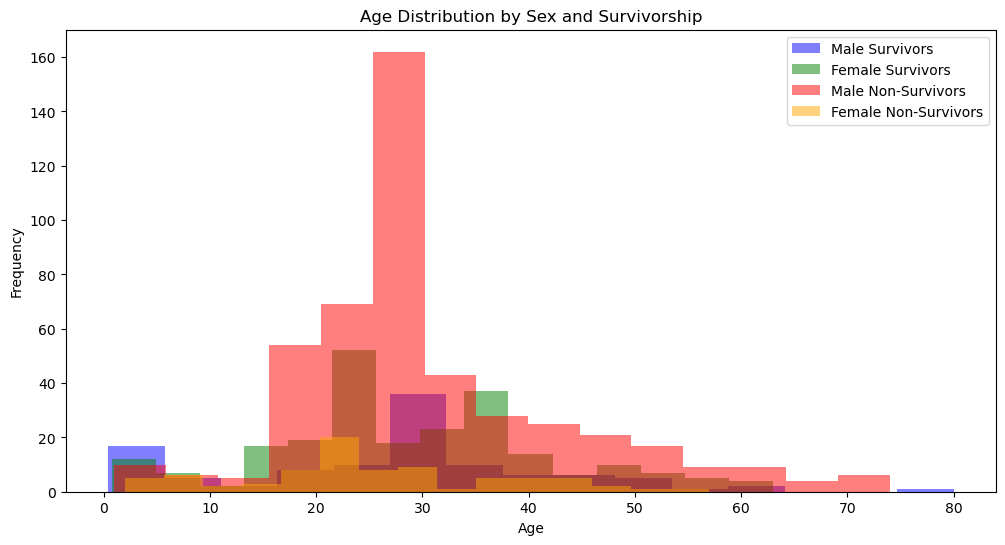

In [51]:
survivors = df[df['Survived'] == 1][['Age', 'Name', 'Sex']]
non_survivors = df[df['Survived'] == 0][['Age', 'Name', 'Sex']]

print("First five rows of survivors:\n", survivors.head())
print("First five rows of non-survivors:\n", non_survivors.head())


plt.figure(figsize=(12, 6))
plt.hist(df[(df['Survived'] == 1) & (df['Sex'] == 1)]['Age'].dropna(), bins=15, alpha=0.5, label='Male Survivors', color='blue', histtype='stepfilled')
plt.hist(df[(df['Survived'] == 1) & (df['Sex'] == 0)]['Age'].dropna(), bins=15, alpha=0.5, label='Female Survivors', color='green', histtype='stepfilled')
plt.hist(df[(df['Survived'] == 0) & (df['Sex'] == 1)]['Age'].dropna(), bins=15, alpha=0.5, label='Male Non-Survivors', color='red', histtype='stepfilled')
plt.hist(df[(df['Survived'] == 0) & (df['Sex'] == 0)]['Age'].dropna(), bins=15, alpha=0.5, label='Female Non-Survivors', color='orange', histtype='stepfilled')


plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Sex and Survivorship')
plt.legend()
plt.show()


### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

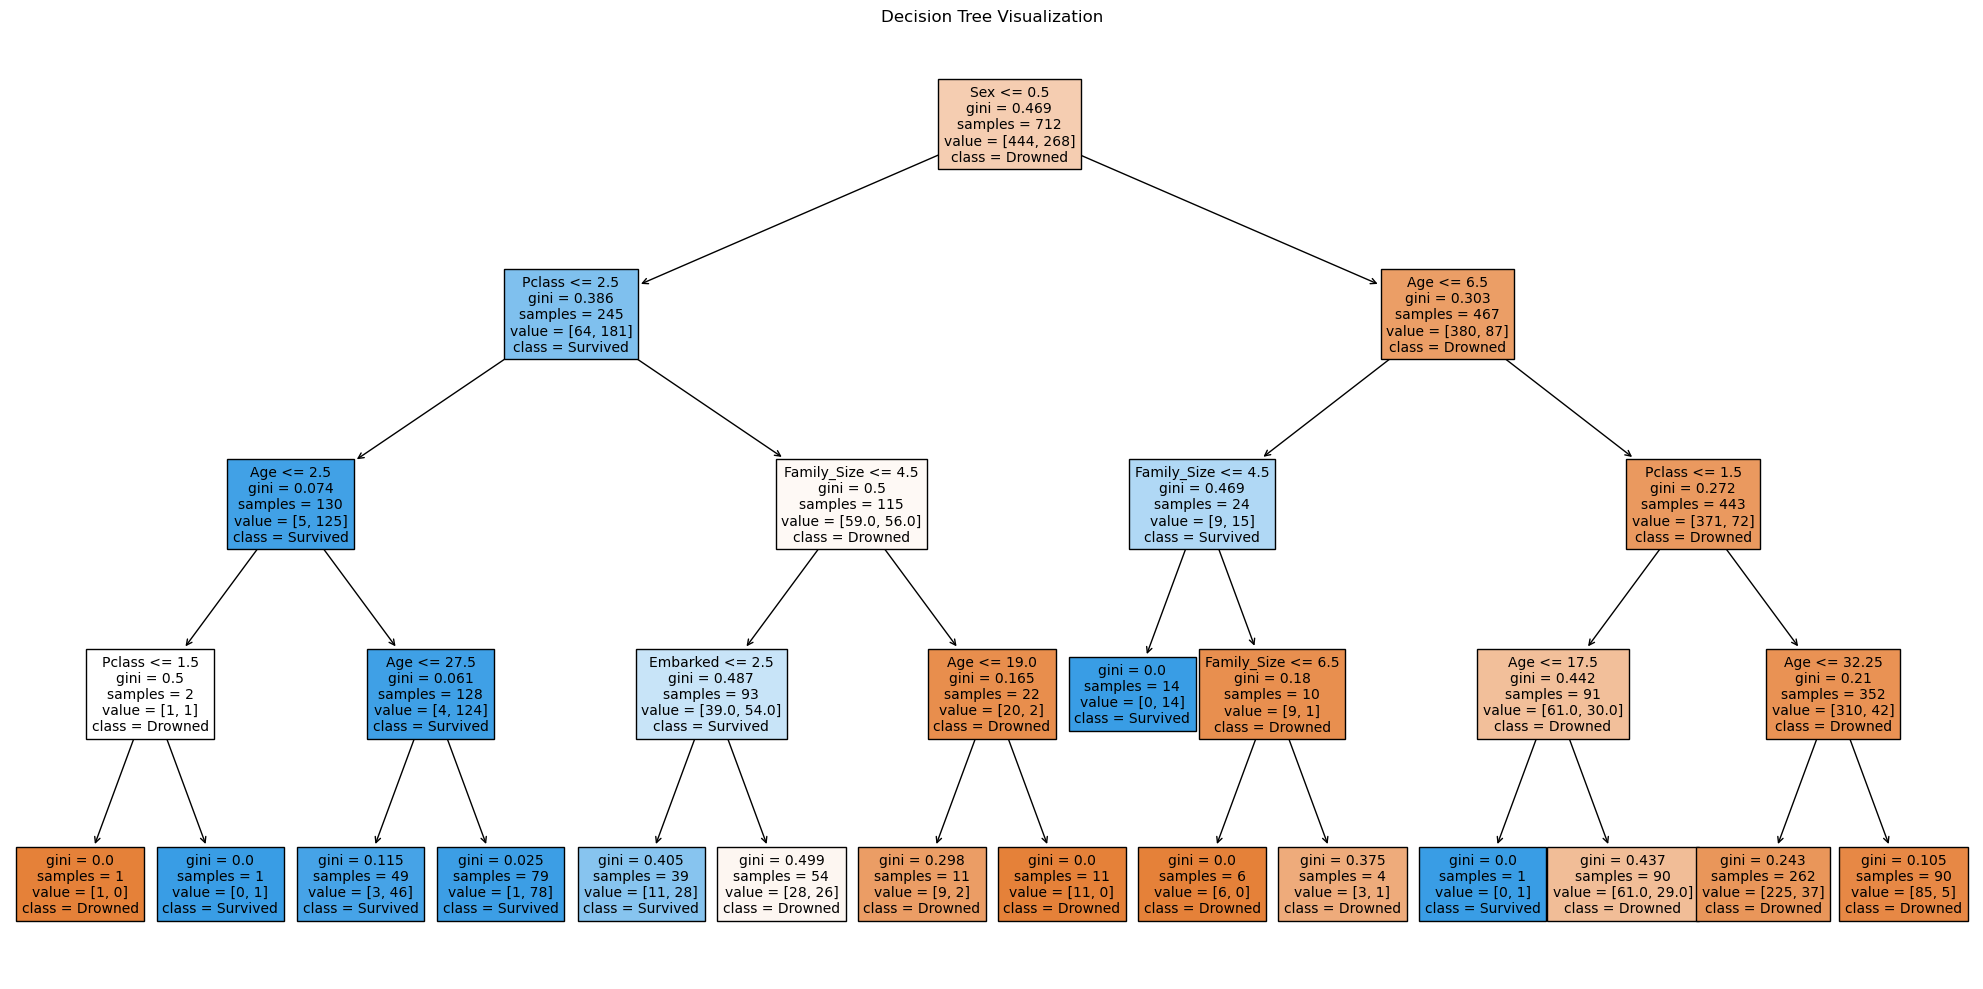

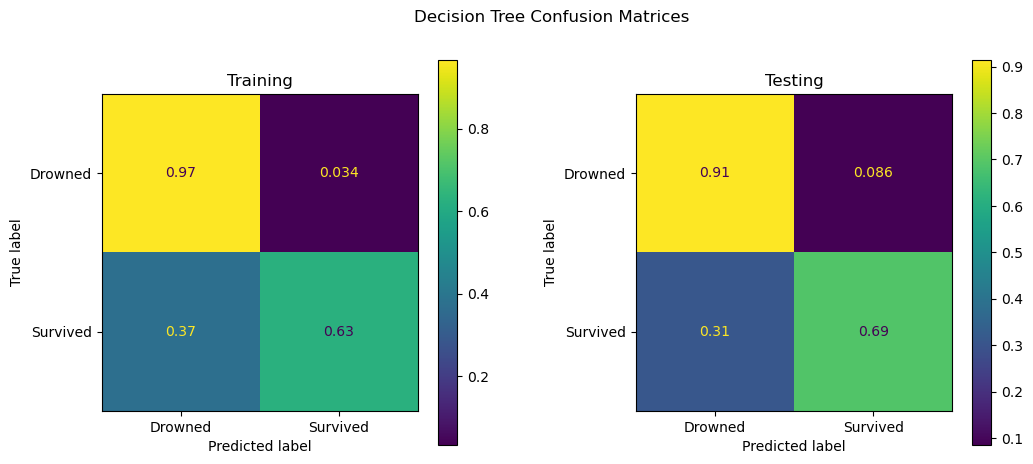

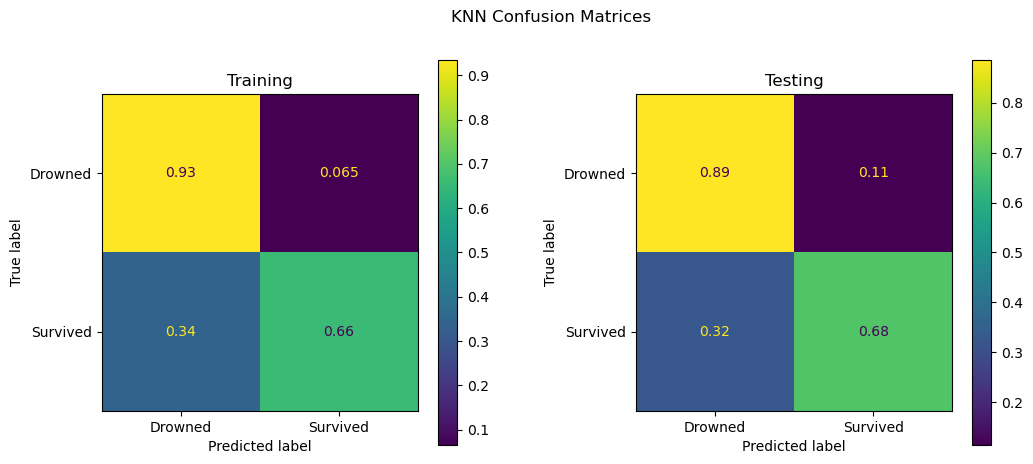

Decision Tree Performance:
Training Accuracy: 83.85%
Testing Accuracy: 82.12%

KNN Performance:
Training Accuracy: 83.01%
Testing Accuracy: 79.89%


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay

def load_and_preprocess_data():

    df = pd.read_csv('titanic.csv') 

   
    df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

    
    df['Embarked'] = df['Embarked'].map({'C': 1, 'Q': 2, 'S': 3}).fillna(0)

    return df

# Load and preprocess the data
data = load_and_preprocess_data()

# Define label and features
label = 'Survived'
features = ['Sex', 'Age', 'Pclass', 'Family_Size', 'Embarked']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data[features], 
    data[label], 
    test_size=0.2, 
    random_state=42
)

# Decision Tree Classifier
def decision_tree_analysis(X_train, X_test, y_train, y_test):
    # Create pipeline with imputation
    tree_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('classifier', DecisionTreeClassifier(max_depth=4))
    ])
    
    # Fit the pipeline
    tree_pipeline.fit(X_train, y_train)
    tree_clf = tree_pipeline.named_steps['classifier']
    
    # Visualize the decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(
        tree_clf, 
        feature_names=features, 
        class_names=["Drowned", "Survived"], 
        filled=True, 
        fontsize=10
    )
    plt.title("Decision Tree Visualization")
    plt.tight_layout()
    plt.show()
    

    y_tree_train = tree_pipeline.predict(X_train)
    y_tree_test = tree_pipeline.predict(X_test)
    

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ConfusionMatrixDisplay.from_predictions(
        y_train, y_tree_train, 
        normalize='true', 
        display_labels=["Drowned", "Survived"], 
        ax=ax[0]
    )
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_tree_test, 
        normalize='true', 
        display_labels=["Drowned", "Survived"], 
        ax=ax[1]
    )
    ax[0].set_title("Training")
    ax[1].set_title("Testing")
    fig.suptitle("Decision Tree Confusion Matrices")
    plt.subplots_adjust(wspace=0.35)
    plt.show()
    
    return tree_pipeline, y_tree_train, y_tree_test


def knn_analysis(X_train, X_test, y_train, y_test):

    knn_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier(n_neighbors=15))
    ])
    

    knn_pipeline.fit(X_train, y_train)
    

    y_knn_train = knn_pipeline.predict(X_train)
    y_knn_test = knn_pipeline.predict(X_test)
    

    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    ConfusionMatrixDisplay.from_predictions(
        y_train, y_knn_train, 
        normalize='true', 
        display_labels=["Drowned", "Survived"], 
        ax=ax[0]
    )
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_knn_test, 
        normalize='true', 
        display_labels=["Drowned", "Survived"], 
        ax=ax[1]
    )
    ax[0].set_title("Training")
    ax[1].set_title("Testing")
    fig.suptitle("KNN Confusion Matrices")
    plt.subplots_adjust(wspace=0.35)
    plt.show()
    
    return knn_pipeline, y_knn_train, y_knn_test


tree_clf, y_tree_train, y_tree_test = decision_tree_analysis(X_train, X_test, y_train, y_test)
knn_clf, y_knn_train, y_knn_test = knn_analysis(X_train, X_test, y_train, y_test)


print("Decision Tree Performance:")
print(f"Training Accuracy: {tree_clf.score(X_train, y_train):.2%}")
print(f"Testing Accuracy: {tree_clf.score(X_test, y_test):.2%}")

print("\nKNN Performance:")
print(f"Training Accuracy: {knn_clf.score(X_train, y_train):.2%}")
print(f"Testing Accuracy: {knn_clf.score(X_test, y_test):.2%}")

1. How does the model performance on the test data compare to the training data?
The Decision Tree has a small gap between training (83.85%) and testing (82.12%) accuracies, indicating good generalization.
The KNN model shows a larger gap (83.01% vs. 79.89%), suggesting it struggles more with generalization.

3. Which models did you fit and which worked better?
Fitted Models: Decision Tree and K-Nearest Neighbors (KNN).
Better Model: The Decision Tree performed better with higher testing accuracy and better generalization.
 
 - 